In [1]:
# import the Pandas, Matplotlib, and NumPy dependencies in the first cell, and run the cell.

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
### 6.2.6 - Get the City Weather Data

import time

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        time.sleep(60)
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | nioro
Processing Record 3 of Set 1 | lithakia
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | kirakira
Processing Record 6 of Set 1 | fort saint john
City not found. Skipping...
Processing Record 7 of Set 1 | sault sainte marie
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | istok
Processing Record 10 of Set 1 | olinda
Processing Record 11 of Set 1 | araouane
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | constitucion
Processing Record 14 of Set 1 | peniche
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | bargal
City not found. Skipping...
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | jinchengjiang
City not found. Skipping...
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | 

Processing Record 38 of Set 4 | mecca
Processing Record 39 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 40 of Set 4 | zilair
Processing Record 41 of Set 4 | tura
Processing Record 42 of Set 4 | jawad
Processing Record 43 of Set 4 | port moresby
Processing Record 44 of Set 4 | lokosovo
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | stephenville
Processing Record 47 of Set 4 | soderhamn
Processing Record 48 of Set 4 | vytegra
Processing Record 49 of Set 4 | benghazi
Processing Record 50 of Set 4 | kananga
Processing Record 1 of Set 5 | kununurra
Processing Record 2 of Set 5 | vostok
Processing Record 3 of Set 5 | los llanos de aridane
Processing Record 4 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | whitianga
Processing Record 7 of Set 5 | kerema
Processing Record 8 of Set 5 | santa catarina de tepehuanes
Processing Record 9 of Set 5 | talaya
Processing Record 10 of Set

Processing Record 25 of Set 8 | fairbanks
Processing Record 26 of Set 8 | hovd
Processing Record 27 of Set 8 | airai
Processing Record 28 of Set 8 | awbari
Processing Record 29 of Set 8 | sinnamary
Processing Record 30 of Set 8 | baft
Processing Record 31 of Set 8 | mpika
Processing Record 32 of Set 8 | boa vista
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | scarborough
Processing Record 35 of Set 8 | tessalit
Processing Record 36 of Set 8 | ocos
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | komsomolskiy
Processing Record 39 of Set 8 | pampa
Processing Record 40 of Set 8 | valparaiso
Processing Record 41 of Set 8 | dakar
Processing Record 42 of Set 8 | pevek
Processing Record 43 of Set 8 | kloulklubed
Processing Record 44 of Set 8 | neiafu
Processing Record 45 of Set 8 | monrovia
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 | majene
Processing Record 48 of Set 8 | kaduqli
Processing Record 49 of Set 8 | 

Processing Record 18 of Set 12 | borama
City not found. Skipping...
Processing Record 19 of Set 12 | saint george
Processing Record 20 of Set 12 | lalin
Processing Record 21 of Set 12 | kruisfontein
Processing Record 22 of Set 12 | katastarion
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | sanchez
Processing Record 25 of Set 12 | axim
Processing Record 26 of Set 12 | acarigua
Processing Record 27 of Set 12 | ossora
Processing Record 28 of Set 12 | tabas
Processing Record 29 of Set 12 | tarko-sale
Processing Record 30 of Set 12 | galashki
Processing Record 31 of Set 12 | labuhan
Processing Record 32 of Set 12 | sand springs
Processing Record 33 of Set 12 | oistins
Processing Record 34 of Set 12 | moose factory
Processing Record 35 of Set 12 | winona
Processing Record 36 of Set 12 | teberda
Processing Record 37 of Set 12 | waingapu
Processing Record 38 of Set 12 | panguna
Processing Record 39 of Set 12 | xadani
City not found. Skippi

In [8]:
# tally the number of cities in the city_data array

len(city_data)

564

In [9]:
### 6.2.7 Create a DataFrame of City Weather Data

# convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,32.23,93,1,4.61,CA,2021-05-29 00:56:12
1,Nioro,13.3500,-15.7500,79.70,39,2,7.54,GM,2021-05-29 00:56:12
2,Lithakia,37.7167,20.8333,65.32,74,36,11.12,GR,2021-05-29 00:56:12
3,Mataura,-46.1927,168.8643,49.48,95,100,3.94,NZ,2021-05-29 00:56:12
4,Kirakira,-10.4544,161.9205,79.36,82,100,8.12,SB,2021-05-29 00:56:13
5,Sault Sainte Marie,46.5168,-84.3333,50.29,50,1,9.22,CA,2021-05-29 00:54:29
6,Saint-Pierre,-21.3393,55.4781,69.48,63,0,9.22,RE,2021-05-29 00:56:13
7,Istok,42.7808,20.4875,49.15,82,98,4.18,XK,2021-05-29 00:56:14
8,Olinda,-8.0089,-34.8553,76.73,73,75,13.51,BR,2021-05-29 00:56:14
9,Araouane,18.9048,-3.5265,96.67,18,58,10.42,ML,2021-05-29 00:56:14


In [10]:
# reorder the columns

new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Clyde River,1,CA,2021-05-29 00:56:12,93,70.4692,-68.5914,32.23,4.61
1,Nioro,2,GM,2021-05-29 00:56:12,39,13.3500,-15.7500,79.70,7.54
2,Lithakia,36,GR,2021-05-29 00:56:12,74,37.7167,20.8333,65.32,11.12
3,Mataura,100,NZ,2021-05-29 00:56:12,95,-46.1927,168.8643,49.48,3.94
4,Kirakira,100,SB,2021-05-29 00:56:13,82,-10.4544,161.9205,79.36,8.12
...,...,...,...,...,...,...,...,...,...
559,Ampanihy,0,MG,2021-05-29 01:12:10,79,-24.7000,44.7500,62.06,4.18
560,Salisbury,99,GB,2021-05-29 01:09:31,84,51.0693,-1.7957,57.61,3.15
561,Pohrebyshche,100,UA,2021-05-29 01:12:11,97,49.4864,29.2636,55.83,9.64
562,Puerto Ayacucho,90,VE,2021-05-29 01:12:11,90,5.6639,-67.6236,76.84,3.62


In [12]:
# # Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Clyde River,1,CA,2021-05-29 00:56:12,93,70.4692,-68.5914,32.23,4.61
1,Nioro,2,GM,2021-05-29 00:56:12,39,13.3500,-15.7500,79.70,7.54
2,Lithakia,36,GR,2021-05-29 00:56:12,74,37.7167,20.8333,65.32,11.12
3,Mataura,100,NZ,2021-05-29 00:56:12,95,-46.1927,168.8643,49.48,3.94
4,Kirakira,100,SB,2021-05-29 00:56:13,82,-10.4544,161.9205,79.36,8.12


In [14]:
#### Unit 3 - Plot Weather Data
### 6.3.1 - Plot Latitude vs Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

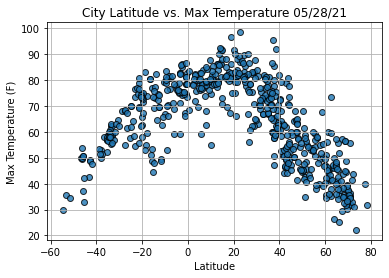

In [15]:
# Plot the data - we need the date at the top of the plot 

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

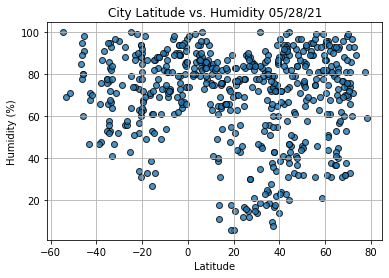

In [16]:
### 6.3.2 - Plot Latitude vs Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

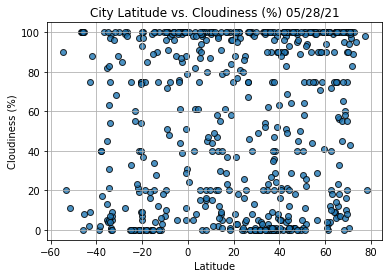

In [17]:
### 6.3.3 - Plot Latitude vs Cloudiness

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

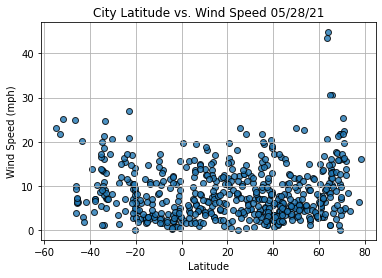

In [18]:
### 6.3.4 - Plot Latitude vs Wind Speed

# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
#### Unit 4 - Determine Correlations
### 6.4.1: Use Linear Regression to Find the Relationship Between Variables

## Practice Using Linear Regression

In [20]:
### 6.4.2 - Find the Correlation Between Latitude and Maximum Temperature 
## Create a Linear Regression Function 

# Let's create a function, "plot_linear_regression"

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# there will be no output until we call the function with five parameters

In [23]:
## Create the Hemisphere DataFrames
# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.

index13 = city_data_df.loc[13]
index13

City                       Albany
Cloudiness                    100
Country                        US
Date          2021-05-29 00:52:29
Humidity                       91
Lat                       42.6001
Lng                      -73.9662
Max Temp                    46.35
Wind Speed                   5.91
Name: 13, dtype: object

In [24]:
# filter dataframe based on value of a row
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
559    False
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [25]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0

city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Clyde River,1,CA,2021-05-29 00:56:12,93,70.4692,-68.5914,32.23,4.61
1,Nioro,2,GM,2021-05-29 00:56:12,39,13.3500,-15.7500,79.70,7.54
2,Lithakia,36,GR,2021-05-29 00:56:12,74,37.7167,20.8333,65.32,11.12
5,Sault Sainte Marie,1,CA,2021-05-29 00:54:29,50,46.5168,-84.3333,50.29,9.22
7,Istok,98,XK,2021-05-29 00:56:14,82,42.7808,20.4875,49.15,4.18


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFRame

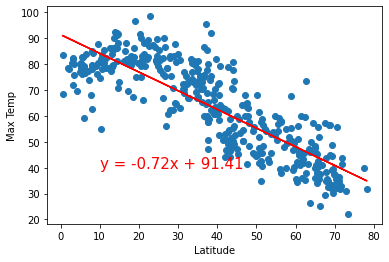

In [27]:
## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

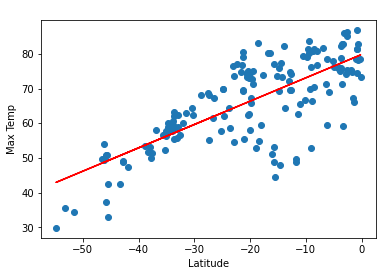

In [28]:
## Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

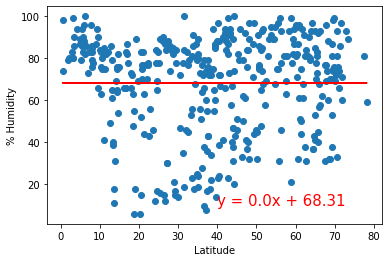

In [29]:
### 6.4.3 - Find the Correlation Between Latitude and Percent Humidity

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

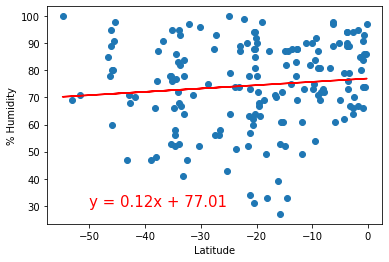

In [30]:
## Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

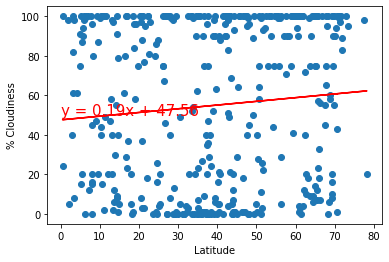

In [31]:
### 6.4.4 - Find the Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,50))

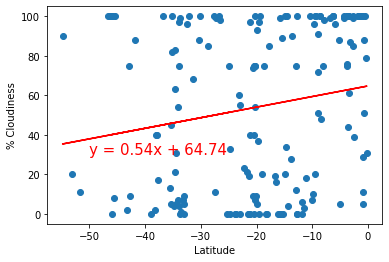

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,30))

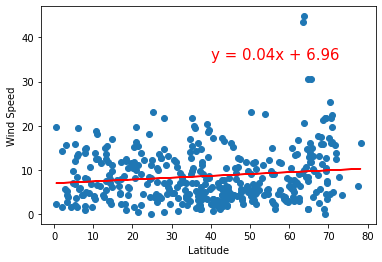

In [33]:
## 6.4.5 - Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

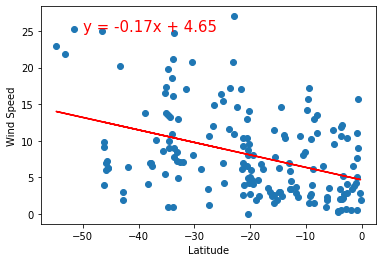

In [34]:
## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [ ]:
#### Unit 5 - Use Google API to Create Place API

### 6.5.1 - Set Up Google Maps and Places API